In [1]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

x라는 칼럼 벡터가 입력되면 최대 `degree차` 까지 `다항벡터`로 변환하는 함수를 만든다.  
numpy의 임의성을 고정하기 위해서는 `np.random.seed`를 이용할 수 있다.  

In [3]:
def transform_to_poly(x, degree=5):
    x_poly = np.zeros((x.shape[0], degree))
    for j in range(degree):
        x_poly[:,j] = x ** (j + 1)
    return x_poly

def make_quadratic_data():
    np.random.seed(0)
    x = np.linspace(0, 2, 100)
    
    x_train = x.reshape(-1, 1)
    y_train = x ** 2 + 0.3 * (np.random.random_sample(x.shape[0]) - 0.5)
    return x, x_train, y_train

x, x_train, y_train = make_quadratic_data()
print(x)
print(x_train.shape)
print(y_train.shape)

[0.         0.02020202 0.04040404 0.06060606 0.08080808 0.1010101
 0.12121212 0.14141414 0.16161616 0.18181818 0.2020202  0.22222222
 0.24242424 0.26262626 0.28282828 0.3030303  0.32323232 0.34343434
 0.36363636 0.38383838 0.4040404  0.42424242 0.44444444 0.46464646
 0.48484848 0.50505051 0.52525253 0.54545455 0.56565657 0.58585859
 0.60606061 0.62626263 0.64646465 0.66666667 0.68686869 0.70707071
 0.72727273 0.74747475 0.76767677 0.78787879 0.80808081 0.82828283
 0.84848485 0.86868687 0.88888889 0.90909091 0.92929293 0.94949495
 0.96969697 0.98989899 1.01010101 1.03030303 1.05050505 1.07070707
 1.09090909 1.11111111 1.13131313 1.15151515 1.17171717 1.19191919
 1.21212121 1.23232323 1.25252525 1.27272727 1.29292929 1.31313131
 1.33333333 1.35353535 1.37373737 1.39393939 1.41414141 1.43434343
 1.45454545 1.47474747 1.49494949 1.51515152 1.53535354 1.55555556
 1.57575758 1.5959596  1.61616162 1.63636364 1.65656566 1.67676768
 1.6969697  1.71717172 1.73737374 1.75757576 1.77777778 1.79797

Coef : [1.9624822]


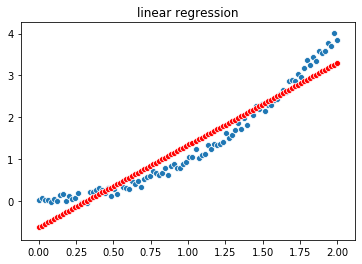

In [5]:
def train_model(x, x_train, y_train, model, title):
    model.fit(x_train, y_train)    
    y_pred = model.predict(x_train)

    print(f'Coef : {model.coef_}')

    # 그림을 겹쳐 그릴 때에는 아래처럼 함수를 실행해야 합니다.
    p = sns.scatterplot(x, y_train)
    p = sns.scatterplot(x, y_pred, color='red')
    plt.title(title)
    p = p.get_figure()

    return p 

model = LinearRegression()
title = 'linear regression'
p = train_model(x, x_train, y_train, model, title)

데이터를 2차 다항 벡터로 만들어 예측해보자

Coef : [-0.08212841  1.0223053 ]


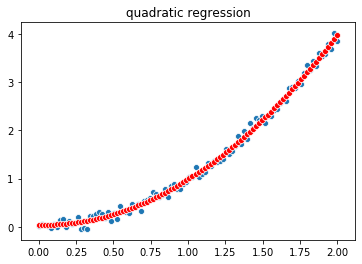

In [6]:
x_train2 = transform_to_poly(x, degree=2)
model = LinearRegression()
title = 'quadratic regression'

p = train_model(x, x_train2, y_train, model, title)

8개의 매우 작은 크기의 데이터를 만들어 보자.  


In [7]:
def make_noisy_linear_data(a=0.5, b=2, n_data=8):
    np.random.seed(6)
    x = np.random.random_sample(n_data)
    y_train = a * x + b + 0.2 * (np.random.random_sample(n_data) - 0.5)
    return x, y_train

x, y_train = make_noisy_linear_data()

print(x.shape, y_train.shape)

(8,) (8,)


max_degree까지 차수를 증가하며 다항벡터로 변환한 뒤, 각각의 polynomial linear regeression 모델을 학습한다.  
각 차수별로 coeffiecient(계수)의 값도 출력한다.  

In [9]:
def train_overfitted_model(x, y_train, model, prefix, max_degree=6):
    figures = []
    for d in range(1, max_degree + 1):
        title = f'{prefix}, d={d}'
        x_train = transform_to_poly(x, d)
        model.fit(x_train, y_train)
        
        print(f'Coef (d={d}): {model.coef_}')
        
        x_ = np.linspace(x.min(), x.max(), 1000)
        x_test = transform_to_poly(x_, d)
        y_test = model.predict(x_test)
        
        p = sns.scatterplot(x, y_train)
        p = sns.scatterplot(x_, y_test, color='red')
        plt.title(title)
        p = p.get_figure()
        plt.close()
        figures.append(p)
        
    return figures

model = LinearRegression()
prefix = f'Linear'
figures = train_overfitted_model(x, y_train, model, prefix)

Coef (d=1): [0.43307945]
Coef (d=2): [ 0.68020152 -0.26550572]
Coef (d=3): [ 0.58080279  0.00966002 -0.19596377]
Coef (d=4): [-0.61519563  5.59746788 -9.40998657  4.9265763 ]
Coef (d=5): [ -2.18525029  16.51080822 -39.47691884  40.55677045 -15.17050138]
Coef (d=6): [   1.79278013  -27.25212441  151.96435721 -348.46612558  353.57127515
 -131.90707495]


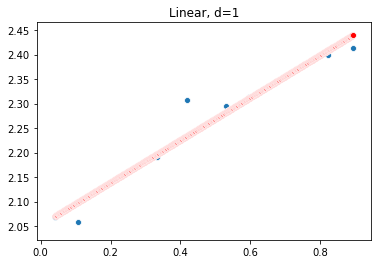

In [10]:
figures[0]

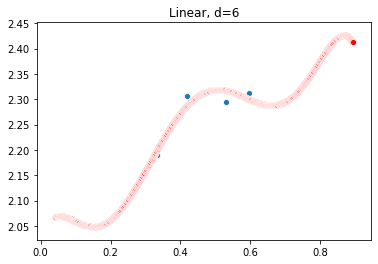

In [11]:
figures[-1]

In [12]:
len(figures)

6

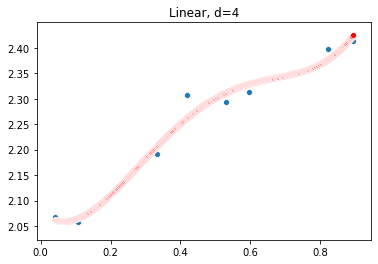

In [13]:
figures[3]

In [14]:
model = Ridge(alpha=0.1)
prefix = f'Ridge'
figures = train_overfitted_model(x, y_train, model, prefix)

Coef (d=1): [0.37592542]
Coef (d=2): [0.29079085 0.10537417]
Coef (d=3): [ 0.29104745  0.10602958 -0.00113246]
Coef (d=4): [ 0.29269584  0.1163458   0.01311102 -0.03352819]
Coef (d=5): [ 0.292338    0.1234026   0.02395974 -0.0212824  -0.03966899]
Coef (d=6): [ 0.29129841  0.12748795  0.03092063 -0.01308833 -0.03116899 -0.03726313]


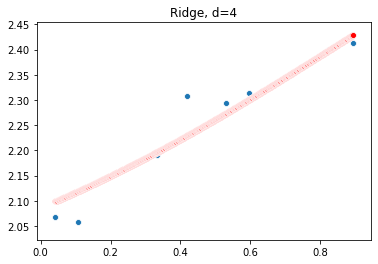

In [15]:
figures[3]

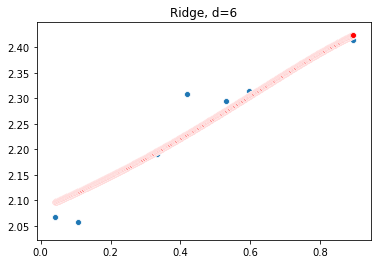

In [16]:
figures[-1]

앞서 만든 train_overfitted_model 함수를 재활용해 Stochastic Gradient Descent를 이용하는 regression model을 학습한다.

In [17]:
model = SGDRegressor(alpha=0.00001, max_iter=1000, eta0=0.01)
prefix = f'SGD'
figures = train_overfitted_model(x, y_train, model, prefix)

Coef (d=1): [0.77210515]
Coef (d=2): [0.68688996 0.4202972 ]
Coef (d=3): [0.65324079 0.39005559 0.26573859]
Coef (d=4): [0.63497929 0.37274241 0.25018129 0.1821676 ]
Coef (d=5): [0.62077459 0.36163125 0.24161569 0.17535216 0.13476016]
Coef (d=6): [0.61740642 0.354891   0.23382207 0.16764363 0.12759124 0.10126141]


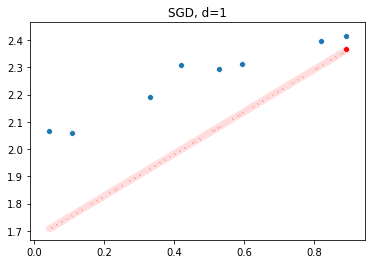

In [18]:
figures[0]

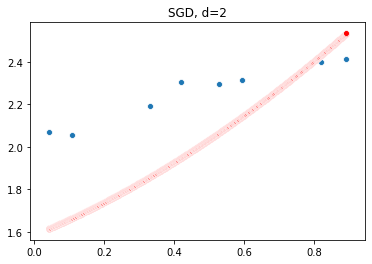

In [19]:
figures[1]